# <img src="https://img.icons8.com/bubbles/100/000000/3d-glasses.png" style="height:50px;display:inline"> EE 046746 - Technion - Computer Vision


## Homework 1 - Image Classification and Foundation Models
---

### <a style='color:red'> Due Date: 10.07.2024 </a>

### <img src="https://img.icons8.com/bubbles/50/000000/upload-to-cloud.png" style="height:50px;display:inline"> Submission Guidelines
---
#### READ THIS CAREFULLY
* Submission only in **pairs**.
* **No handwritten submissions**.
* You can choose your working environment:
    * You can work in a `Jupyter Notebook`, locally with <a href="https://www.anaconda.com/distribution/">Anaconda</a> or online on <a href="https://colab.research.google.com/">Google Colab</a>
  * **Important**: Colab also supports running code on GPU, so if you don't have one, Colab is the way to go. To enable GPU on Colab, in the menu: `Runtime` $\rightarrow$  `Change Runtime Type` $\rightarrow$`GPU`.
    * You can work in a Python IDE such as <a href="https://www.jetbrains.com/pycharm/">PyCharm</a> or <a href="https://code.visualstudio.com/">Visual Studio Code</a>.
        * Both also allow opening/editing Jupyter Notebooks.

* Make sure you submit your exercise according to the requirements in the <a href="https://moodle.technion.ac.il/pluginfile.php/1823033/mod_resource/content/2/Homework%20guidelines.pdf">"Homework submission guidelines"</a> file that appears in the course website (Moodle). 
* **The code should run both on CPU and GPU without manual modifications**, require no special preparation and run on every computer.
* **DON'T** submit the CIFAR-10 dataset in your submission, we have a local copy of it.
* **DON'T** submit the trained networks, but make sure to document every result you get.
* Be precise, we expect on point answers.
* Submission on the course website (Moodle).

### <img src="https://img.icons8.com/dusk/64/000000/python.png" style="height:50px;display:inline"> Python Libraries
---

* `numpy`
* `matplotlib`
* `pytorch` (and `torchvision`)
* `opencv` (or `scikit-image`)
* `scikit-learn`
* Anything else you need (`PIL`, `os`, `pandas`, `csv`, `json`,...)

### <img src="https://img.icons8.com/bubbles/50/000000/checklist.png" style="height:50px;display:inline"> Tasks
---
* In all tasks, you should document your process and results in a report file (which will be saved as `.pdf`). 
* You can reference your code in the report file, but no need for actual code in this file, the code is submitted in a seprate folder as explained above.

In [1]:
import numpy as np
import torchvision
import torchvision.transforms as transforms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import torch
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import random

# set seed
SEED = 666
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)

#### Part 1 - Classic Classifier
---
In this part we are going to examine the performance of a classical classifier over images from the **Canadian Institute For Advanced Research (CIFAR-10)**  Dataset. 

* The CIFAR-10 dataset consists of 60,000 32x32 colour images in 10 classes, with 6,000 images per class. There are 50,000 training images and 10,000 test images.
  * There is also CIFAR-100, with 100 classes.
* The classes are completely mutually exclusive. For example, there is no overlap between automobiles and trucks. "Automobile" includes sedans, SUVs, things of that sort. "Truck" includes only big trucks. Neither includes pickup trucks.
* <a href="https://www.cs.toronto.edu/~kriz/cifar.html">Official Site</a>


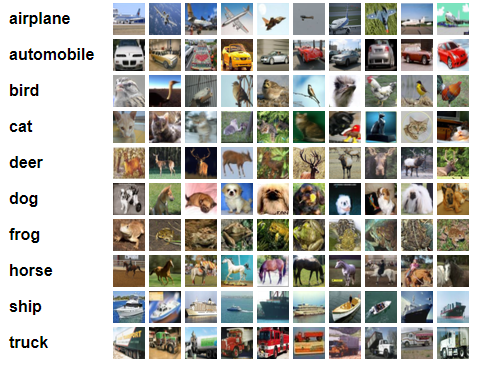


1. Load the CIFAR-10 training and test set with PyTorch (<a href="https://pytorch.org/vision/stable/generated/torchvision.datasets.CIFAR10.html#torchvision.datasets.CIFAR10">read more here</a>). Display 5 images from the training set with their labels as title.

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),  # convert images to PyTorch tensors
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # normalize the dataset
])

train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

100%|██████████| 170498071/170498071 [00:12<00:00, 13729981.42it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


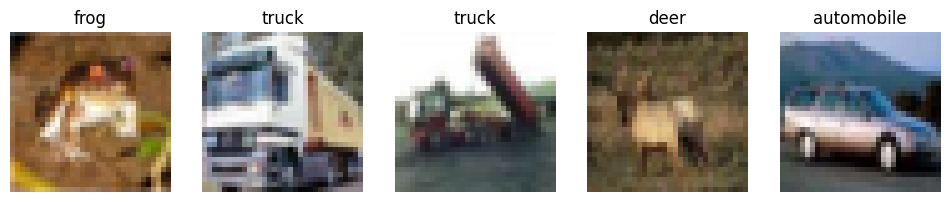

In [3]:
# Function to unnormalize and convert tensor to numpy array
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))  # convert from Tensor image

# Get some random training images
dataiter = iter(train_dataset)
images, labels = [], []
for i in range(5):
    image, label = next(dataiter)
    images.append(image)
    labels.append(label)

# Plot the images
fig, axes = plt.subplots(1, 5, figsize=(12, 2.4))
for i, (img, label) in enumerate(zip(images, labels)):
    ax = axes[i]
    ax.imshow(np.transpose(img.numpy(), (1, 2, 0)) / 2 + 0.5)
    ax.set_title(train_dataset.classes[label])
    ax.axis('off')
plt.show()

2. Build a K-Nearest Neighbors (K-NN) classifier (hint: `sklearn.neighbors.KNeighborsClassifier`), with `n_neighbors=10`, to classify CIFAR-10: Load 10,000 samples from the training set and train the model. 

  **Note**: The model's input dimension should be : `(n_samples, n_features)`, Thus you need to convert each color channel to row representation and then concatenate the 3 color channels.

In [4]:
random_indices = random.sample(range(len(train_dataset)), 10000)
train_data = [train_dataset[i] for i in random_indices]
train_images = np.array([np.concatenate(image.numpy().reshape(3, -1), axis=0) for image, _ in train_data])
train_labels = np.array([label for _, label in train_data])

# Select all samples from the test set
test_data = [test_dataset[i] for i in range(len(test_dataset))]
test_images = np.array([np.concatenate(image.numpy().reshape(3, -1), axis=0) for image, _ in test_data])
test_labels = np.array([label for _, label in test_data])

# Initialize and train the K-NN classifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(train_images, train_labels)

# Predict on the test set
test_predictions = knn.predict(test_images)

# Calculate accuracy
accuracy = accuracy_score(test_labels, test_predictions)
print(f'Test Accuracy: {accuracy:.4f}')

Test Accuracy: 0.2919


In [5]:
(n_samples, n_features) = train_images.shape

3. Load 1,000 samples from CIFAR-10 test set and check the performance of the K-NN classifier over these samples. What is the accuracy obtained? View the results using a confusion matrix(see <a href="https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62">here</a> for more information)

Test Accuracy on 1,000 samples: 0.2960


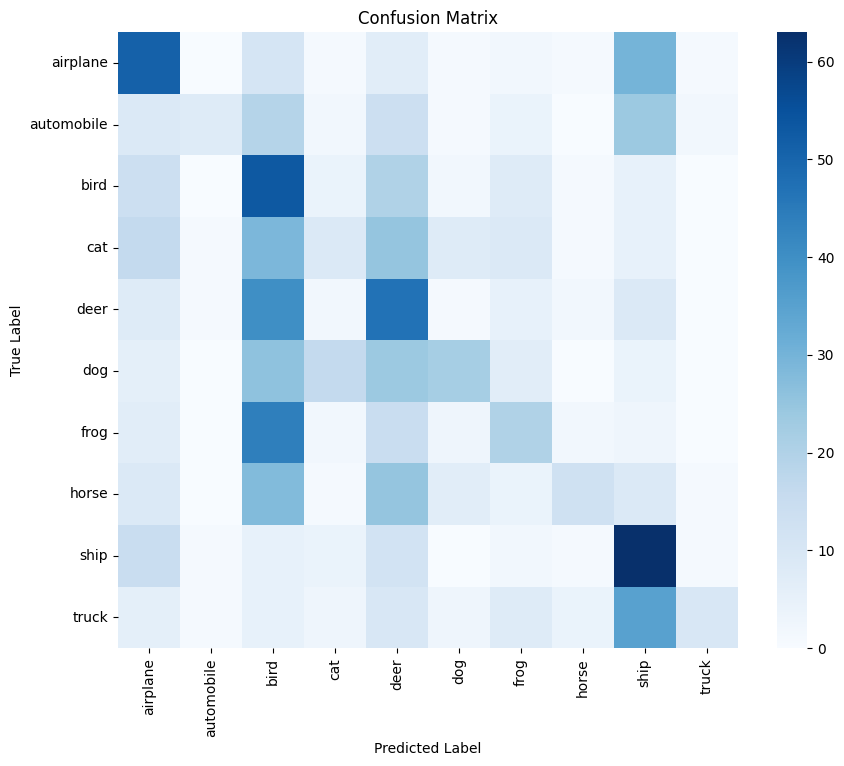

In [6]:
# Select 1,000 samples from the test set
random_indices_1000 = random.sample(range(len(test_dataset)), 1000)
test_data_1000 = [test_dataset[i] for i in random_indices_1000]
test_images_1000 = np.array([np.concatenate(image.numpy().reshape(3, -1), axis=0) for image, _ in test_data_1000])
test_labels_1000 = np.array([label for _, label in test_data_1000])

# Initialize and train the K-NN classifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(train_images, train_labels)

# Predict on the 1,000 test samples
test_predictions_1000 = knn.predict(test_images_1000)

# Calculate accuracy
accuracy_1000 = accuracy_score(test_labels_1000, test_predictions_1000)
print(f'Test Accuracy on 1,000 samples: {accuracy_1000:.4f}')

# Generate confusion matrix
conf_matrix = confusion_matrix(test_labels_1000, test_predictions_1000)

# Display confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, fmt='d', cmap='Blues', xticklabels=train_dataset.classes, yticklabels=train_dataset.classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

4. Compare the model's accuracy for different number of neighbors ($1 \leq K \leq 30$ ). Display the results in a graph of accuracy as function of $K$.

In [7]:
accuracies = []

# Train and evaluate K-NN for K values from 1 to 30
for k in range(1, 31):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_images, train_labels)
    test_predictions = knn.predict(test_images)
    accuracy = accuracy_score(test_labels, test_predictions)
    accuracies.append(accuracy)
    print(f'Accuracy for K={k}: {accuracy:.4f}')

# Plot accuracy as function of K
plt.figure(figsize=(10, 6))
plt.plot(range(1, 31), accuracies, marker='o')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Accuracy')
plt.title('Accuracy as a Function of K in K-NN')
plt.grid(True)
plt.show()

Accuracy for K=1: 0.2886
Accuracy for K=2: 0.2572


KeyboardInterrupt: 

#### Part 2 - Design and Build a CNN Classifier
---
In this part you are going to design a deep convolutional neural network to classify CIFAR-10 dataset. 

1. Use the CNN from tutorials 3-4 , provided in the next block(`SvhnCnn()`) and train it on the CIFAR-10 dataset (**keep the architecture the same**) for the same number of **epochs** with the same learning rate (try to keep the batch size the same, but if you get memory errors, you can reduce it). What is the accuracy on the test set? What classes are most confusing for this model?
    * Your test accuracy from this section will be your **baseline** accuracy for sections 2-3.

In [8]:
# imports for the tutorial
import numpy as np
import matplotlib.pyplot as plt
import time
import os

# pytorch
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

Using device: cuda


In [ ]:
# define pre-processing steps on the images
# also called "data augementation" (only done for the train set)

transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.ColorJitter(brightness=63. / 255., saturation=[0.5, 1.5], contrast=[0.2, 1.8]),
    transforms.ToTensor(),  # (almost) Always use this!
    # SVHN dataset's:     Mean - R    Mean - G   Mean - B       STD - R     STD - G     STD - B
    transforms.Normalize((0.4376821, 0.4437697, 0.47280442), (0.19803012, 0.20101562, 0.19703614)),
])

# Normalize the test set same as training set without augmentation
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4376821, 0.4437697, 0.47280442), (0.19803012, 0.20101562, 0.19703614)),
])

In [ ]:
class SvhnCNN(nn.Module):
    """CNN for the SVHN Datset"""

    def __init__(self):
        """CNN Builder."""
        super(SvhnCNN, self).__init__()

        self.conv_layer = nn.Sequential(

            # Conv Layer block 1
            nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1),
            # What are the dims after this layer? 
            # How many weights?
            nn.BatchNorm2d(16),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Conv Layer block 2
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout2d(p=0.05),  # <- Why is this here?

            # Modified Conv Layer block 3
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            # As we go deeper - use more channels!
        )

        self.fc_layer = nn.Sequential(
            nn.Dropout(p=0.1),
            nn.Linear(8192, 512),  # <- How do we know it's 8192? Why 512 later?
            nn.ReLU(inplace=True),
            nn.Linear(512, 10)  # <- Why 10 here?
        )


    def forward(self, x):
        """Perform forward."""
        
        # conv layers
        x = self.conv_layer(x)
        
        # flatten
        x = x.view(x.size(0), -1)
        
        # fc layer
        x = self.fc_layer(x)

        return x

In [ ]:
def get_test_accuracy(model, test):
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in test:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return correct / total

In [ ]:
train_dataloader = torch.utils.data.DataLoader(train_data, batch_size=128, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(test_data, batch_size=128, shuffle=False)

# Initialize the model
model = SvhnCNN().to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Train the model
def train_model(model, train_dataloader, test_dataloader, criterion, optimizer, num_epochs=100):
    model.train()
    train_losses = []
    train_accuracies = []
    test_accuracies = []

    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(train_dataloader):

            images = images.to(device)
            labels = labels.to(device)

            model.train()
            outputs = model(images)
            loss = criterion(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        test_accuracy  = get_test_accuracy(model, test_dataloader)
        train_accuracy = get_test_accuracy(model, train_dataloader)
        train_losses.append(loss.item())
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)  
        print(f'Epoch [{epoch + 1}/{num_epochs}], Train Loss: {loss.item():.4f}, Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}')

    return train_losses, train_accuracies, test_accuracies

In [ ]:
train_losses, train_accuracies, test_accuracies = train_model(model, train_dataloader, test_dataloader, criterion, optimizer, num_epochs=100)        

In [ ]:
#  Test the model
test_accuracy = get_test_accuracy(model, test_dataloader)
print(f'Test Accuracy: {test_accuracy:.4f}')

Test Accuracy: 0.6104


2. Design your own Convolutional Neural Network (CNN) to classify CIFAR-10. You can modify the network from section 1,but **you must get a better result than your baseline accuracy from section 1**.
    * You **need** to use one of the following in your CNN - Residual block, activation function <a href="https://pytorch.org/docs/stable/generated/torch.nn.PReLU.html">PReLU</a>, activation function Leaky ReLU, Group Normalization, <a href="https://towardsdatascience.com/intuitive-explanation-of-exponential-moving-average-2eb9693ea4dc">Exponential moving average (EMA)</a>.
      Explain the technique you have chosen.
    * Describe the chosen architecture, how many layers? What activations did you choose? What are the filter sizes? Did you use fully-connected layers (if you did, explain their sizes)?
    * What is the input dimension? What is the output dimension?
    * Calculate the number of parameters (weights) in the network.

  **Note:** 
    * The new network should perform better over the same task (i.e. using the same data with the same hyper-parameters. Change only the network architecture).
    * Students who reach the highest accuracy over the test set will receive **5 bonus points** for this exercise.


# TODO: DESCRIBE ARCHITECTURE AND SO!!!

In [ ]:
import torch
import torch.nn as  nn
import torch.nn.functional as F


class Bottleneck(nn.Module):
    expansion = 4
    def __init__(self, in_channels, out_channels, i_downsample=None, stride=1):
        super(Bottleneck, self).__init__()
        
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=1, padding=0)
        self.batch_norm1 = nn.BatchNorm2d(out_channels)
        
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=stride, padding=1)
        self.batch_norm2 = nn.BatchNorm2d(out_channels)
        
        self.conv3 = nn.Conv2d(out_channels, out_channels*self.expansion, kernel_size=1, stride=1, padding=0)
        self.batch_norm3 = nn.BatchNorm2d(out_channels*self.expansion)
        
        self.i_downsample = i_downsample
        self.stride = stride
        self.relu = nn.ReLU()
        
    def forward(self, x):
        identity = x.clone()
        x = self.relu(self.batch_norm1(self.conv1(x)))
        
        x = self.relu(self.batch_norm2(self.conv2(x)))
        
        x = self.conv3(x)
        x = self.batch_norm3(x)
        
        #downsample if needed
        if self.i_downsample is not None:
            identity = self.i_downsample(identity)
        #add identity
        x+=identity
        x=self.relu(x)
        
        return x

class Block(nn.Module):
    expansion = 1
    def __init__(self, in_channels, out_channels, i_downsample=None, stride=1):
        super(Block, self).__init__()
       

        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1, stride=stride, bias=False)
        self.batch_norm1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1, stride=stride, bias=False)
        self.batch_norm2 = nn.BatchNorm2d(out_channels)

        self.i_downsample = i_downsample
        self.stride = stride
        self.relu = nn.ReLU()

    def forward(self, x):
      identity = x.clone()

      x = self.relu(self.batch_norm2(self.conv1(x)))
      x = self.batch_norm2(self.conv2(x))

      if self.i_downsample is not None:
          identity = self.i_downsample(identity)
      print(x.shape)
      print(identity.shape)
      x += identity
      x = self.relu(x)
      return x


        
        
class ResNet(nn.Module):
    def __init__(self, ResBlock, layer_list, num_classes, num_channels=3):
        super(ResNet, self).__init__()
        self.in_channels = 64
        
        self.conv1 = nn.Conv2d(num_channels, 64, kernel_size=7, stride=2, padding=3, bias=False)
        self.batch_norm1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU()
        self.max_pool = nn.MaxPool2d(kernel_size = 3, stride=2, padding=1)
        
        self.layer1 = self._make_layer(ResBlock, layer_list[0], planes=64)
        self.layer2 = self._make_layer(ResBlock, layer_list[1], planes=128, stride=2)
        self.layer3 = self._make_layer(ResBlock, layer_list[2], planes=256, stride=2)
        self.layer4 = self._make_layer(ResBlock, layer_list[3], planes=512, stride=2)
        
        self.avgpool = nn.AdaptiveAvgPool2d((1,1))
        self.fc = nn.Linear(512*ResBlock.expansion, num_classes)
        
    def forward(self, x):
        x = self.relu(self.batch_norm1(self.conv1(x)))
        x = self.max_pool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        
        x = self.avgpool(x)
        x = x.reshape(x.shape[0], -1)
        x = self.fc(x)
        
        return x
        
    def _make_layer(self, ResBlock, blocks, planes, stride=1):
        ii_downsample = None
        layers = []
        
        if stride != 1 or self.in_channels != planes*ResBlock.expansion:
            ii_downsample = nn.Sequential(
                nn.Conv2d(self.in_channels, planes*ResBlock.expansion, kernel_size=1, stride=stride),
                nn.BatchNorm2d(planes*ResBlock.expansion)
            )
            
        layers.append(ResBlock(self.in_channels, planes, i_downsample=ii_downsample, stride=stride))
        self.in_channels = planes*ResBlock.expansion
        
        for i in range(blocks-1):
            layers.append(ResBlock(self.in_channels, planes))
            
        return nn.Sequential(*layers)

        
        
def ResNet50(num_classes, channels=3):
    return ResNet(Bottleneck, [3,4,6,3], num_classes, channels)
    
def ResNet101(num_classes, channels=3):
    return ResNet(Bottleneck, [3,4,23,3], num_classes, channels)

def ResNet152(num_classes, channels=3):
    return ResNet(Bottleneck, [3,8,36,3], num_classes, channels)

3. Train the classifier (preferably on a **GPU - use Colab for this part** if you don't have a GPU).
    * Describe the hyper-parameters of the model (batch size, epochs, learning rate....). How did you tune your model? Did you use a validation set to tune the model? (<a href="https://gist.github.com/MattKleinsmith/5226a94bad5dd12ed0b871aed98cb123">Separating to train/validation/test in PyTorch</a>)
    * What is the final accuracy on the test set?

In [ ]:
# Define the model
model = ResNet50(num_classes=10, channels=3).to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Train the model
train_losses, train_accuracies, test_accuracies = train_model(model, train_dataloader, test_dataloader, criterion, optimizer, num_epochs=100)

# Test the model
test_accuracy = get_test_accuracy(model, test_dataloader)

Epoch [1/100], Train Loss: 1.6427, Train Accuracy: 0.3954, Test Accuracy: 0.3543
Epoch [2/100], Train Loss: 1.3530, Train Accuracy: 0.4456, Test Accuracy: 0.3983
Epoch [3/100], Train Loss: 2.7214, Train Accuracy: 0.4598, Test Accuracy: 0.4181
Epoch [4/100], Train Loss: 3.5725, Train Accuracy: 0.3289, Test Accuracy: 0.3045
Epoch [5/100], Train Loss: 3.4591, Train Accuracy: 0.4255, Test Accuracy: 0.3937
Epoch [6/100], Train Loss: 2.4446, Train Accuracy: 0.4849, Test Accuracy: 0.4436
Epoch [7/100], Train Loss: 1.1746, Train Accuracy: 0.5129, Test Accuracy: 0.4462
Epoch [8/100], Train Loss: 3.6851, Train Accuracy: 0.6005, Test Accuracy: 0.5097
Epoch [9/100], Train Loss: 2.0975, Train Accuracy: 0.6269, Test Accuracy: 0.5204
Epoch [10/100], Train Loss: 1.5312, Train Accuracy: 0.5828, Test Accuracy: 0.4914
Epoch [11/100], Train Loss: 1.4377, Train Accuracy: 0.6936, Test Accuracy: 0.5415
Epoch [12/100], Train Loss: 0.8850, Train Accuracy: 0.6750, Test Accuracy: 0.5294
Epoch [13/100], Train Los

#### Part 3 - Foundation Models
---
As we've seen, CNNs are very powerful models for image classification, However, they also require a lot of training data and a lot of training time. In this part we will use CLIP, a new model from OpenAI, which is a foundation model for vision and language. CLIP is a neural network trained on a variety of (image, text) pairs. It can be instructed in natural language to predict the most relevant text snippet, given an image, without directly optimizing for the task, similarly it can be asked to predict the most relevant image, given some text. CLIP has been trained on 400 million (image, text) pairs ([read more here](https://openai.com/blog/clip/)).

The following exercise can be done both locally on cpu, and in GPU. consider the following: if it is done on CPU, it will take a long time to run, and that's ok.

We'll first start by installing the CLIP model and the necessary packages:

In [9]:
!pip install git+https://github.com/openai/CLIP.git
!pip install seaborn

  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-v2qtlx09
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-v2qtlx09
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 940.3 kB/s eta 0:00:00 0:00:01
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369491 sha256=ad6c27c7725440a84c201fbe9ef7de47f3237c2b2fdca0666afd59956a1d72a9
  Stored in directory: /tmp/pip-ephem-wheel-cache-c3b12z5m/wheels/da/2b/4c/d6691fa9597aac8bb85d2ac13b112deb897d5b50f5ad9a37e4
Successfully built clip


Now that we've installed the model, we can load it and use it to classify images. We'll start by loading the model.

In [11]:
import torch
import clip
from PIL import Image
import glob
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE


def load_image(image_path):
    """ Load an image from a file path. """
    image = Image.open(image_path).convert("RGB")
    return image
#load the model
device = "cuda:1" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-L/14@336px", device=device)

you can find documentation for this model in the following github: https://github.com/openai/CLIP

1. Load the provided images under the directory data/clip_images. compute their embeddings, and project them to the embedding space using T-SNE(An algorithm for dimensionality reduction)(<a href="https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html">read more here</a>) . Plot the images in the embedding space. Do you see any clusters? What do you think these clusters represent?

In [46]:
# load images from data/clip_images (there are 3 directories: cat, dog, and test)
clip_images = {}
image_paths = []
for category in ['cats', 'dogs']:
    clip_images[category] = []
    for image_path in glob.glob(f'data/clip_images/{category}/*.jpg'):
        image = load_image(image_path)
        clip_images[category].append(image)
        image_paths.append(image_path)

### Example

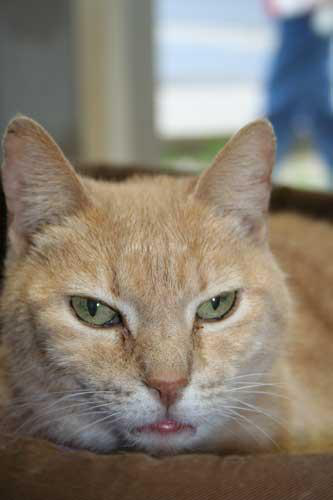

In [47]:
clip_images['cats'][0]

In [48]:

image_categories = []
all_images_embedding= []
for category, images in clip_images.items():
    for image in images:
        image = preprocess(image).unsqueeze(0).to(device)
        embedding= model.encode_image(image).detach().cpu().numpy().squeeze(0)
        image_categories.append(category)
        all_images_embedding.append(embedding)
tsne_embeddding = TSNE(n_components=2, learning_rate='auto',
            init='random', perplexity=3).fit_transform(np.array(all_images_embedding))

    

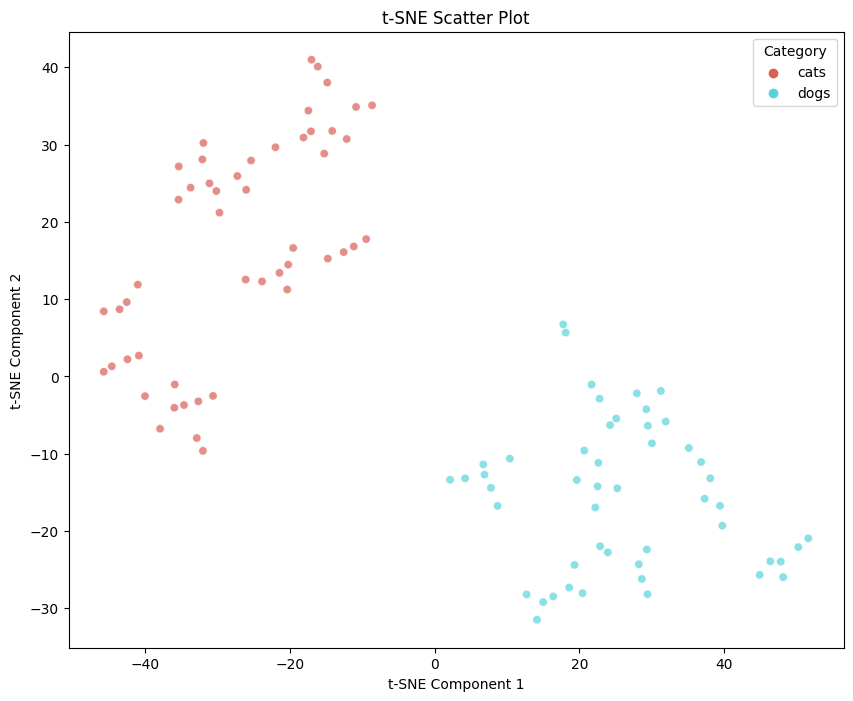

In [53]:
# Create a DataFrame
df = pd.DataFrame(tsne_embeddding, columns=['TSNE1', 'TSNE2'])
df['Category'] = image_categories

# Plot
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='TSNE1', y='TSNE2',
    hue='Category',
    palette=sns.color_palette("hls", 2),  # Adjust the palette to the number of categories
    data=df,
    legend="full",
    alpha=0.7
)
plt.title('t-SNE Scatter Plot')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

2. Load the provided image under the directory data/clip_images, named alfie.jpeg, and display it. Compute its embeddings using the CLIP model. find the top 5 most similar images (according to the cosine similarity between their embeddings). Display the result in as a row of images. Do you think the results make sense? Why?

Top 5 closest vectors (indices): [ 3 21 33 22 39]
Top 5 closest vectors (similarity scores): [0.77729796 0.73159425 0.72779554 0.72733316 0.71539279]


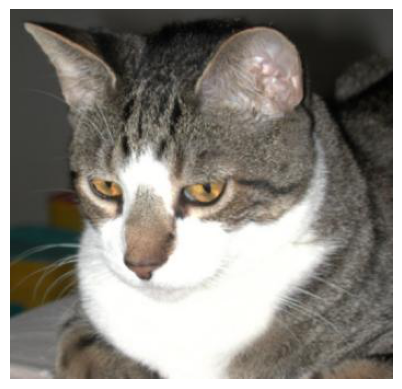

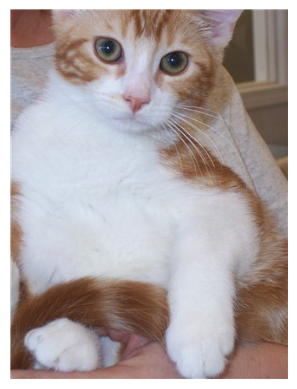

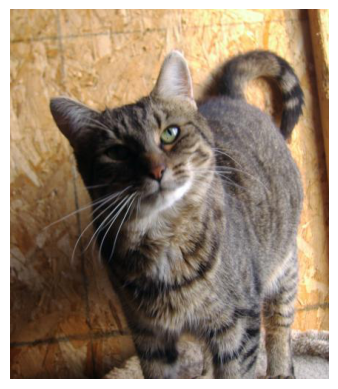

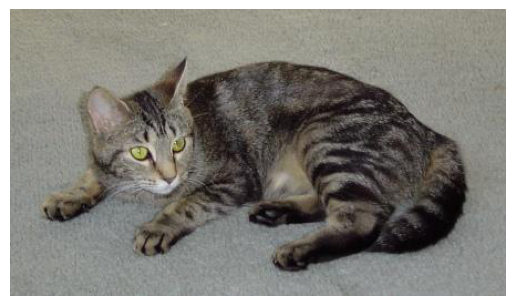

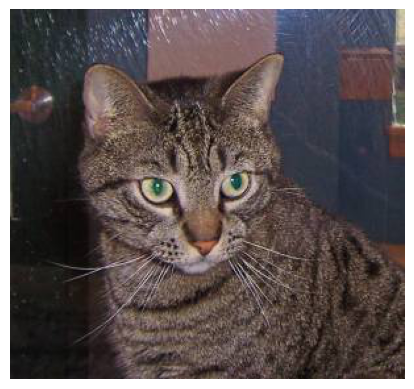

In [65]:
from sklearn.metrics.pairwise import cosine_similarity
import os

alfie= preprocess(load_image(image_path="./data/clip_images/alfie.jpeg")).unsqueeze(0).to(device)
alfie_embedding= model.encode_image(alfie).detach().cpu().numpy().squeeze(0)
np_all_images_embedding= np.array(all_images_embedding)
# print (alfie_embedding.reshape(1,-1))

# Compute cosine similarities
given_vector = alfie_embedding.reshape(1,-1)
similarities = cosine_similarity(given_vector, np_all_images_embedding).flatten()

# Find the top 5 closest vectors
top_5_indices = similarities.argsort()[-5:][::-1]
top_5_vectors = np_all_images_embedding[top_5_indices]

# Print the indices and the corresponding similarity scores
print("Top 5 closest vectors (indices):", top_5_indices)
print("Top 5 closest vectors (similarity scores):", similarities[top_5_indices])

for index in top_5_indices:
    image_path = image_paths[index]
    image = Image.open(image_path)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

Now that we've seen the power of CLIP Embeddings, lets try and use the textual embeddings to classify images.

3. in the data provided with the exercise, look at the directory data/clip_images/test. 

    3.1 Parse the labels in the path data/clip_images/test/labels.txt
    
    3.2 Read the images in data/clip_images/test
    
    3.3 classify each image to one of the classes, Dogs and Cats
    
    3.4 Compute the accuracy of the classification, given the labels in labels.txt, and plot a confusion matrix.

in this exercise, you must use the CLIP Textual embeddings, as shown in the tutorial.  What are the strengths of this approach? What are the weaknesses? If the folder also contained images that are not cats, nor dogs,  how would you classify those images? note - the wanted class in this case would be "Other".

In [58]:
with open('./data/clip_images/test/labels.txt', 'r') as file:
    lines = file.readlines()
labels_dict = {}

for line in lines:
    key, value = line.strip().split(': ')
    labels_dict[key] = value

print(labels_dict)

{'7mvb319cdm.jpg': 'cat', 'gcm2l6otjp.jpg': 'dog', '1si4edqzvn.jpg': 'dog', 'orwtfa66gl.jpg': 'dog', 'keufjohpaj.jpg': 'dog', '89edpnmcog.jpg': 'cat', '27k4lg8ihe.jpg': 'cat', 'bwg1j1w9br.jpg': 'cat', 'xh3txfx15f.jpg': 'cat', 'qit7jqtadj.jpg': 'cat', 'q1xmw3ro8g.jpg': 'cat', '3y3lbi0g4o.jpg': 'cat', 'd74pzqfkff.jpg': 'dog', '2im2jpmebp.jpg': 'cat', 'vc53r3d8hx.jpg': 'cat', 'vyoorybhuj.jpg': 'dog', 'fb4252uqlz.jpg': 'cat', 'x27qp9hf54.jpg': 'cat', 'f7rl1052k9.jpg': 'dog', 'v2s9mf7bfm.jpg': 'dog', '5wv9dutyic.jpg': 'dog', 'c7iwviy53o.jpg': 'dog', 'ip82rndg4t.jpg': 'cat', '4t0s8c7qyi.jpg': 'dog', '1cyvwha01l.jpg': 'dog', 'xivrghekh7.jpg': 'dog', '326e5njjy8.jpg': 'dog', 'l3loxhqqsd.jpg': 'cat', 'eiu07556kb.jpg': 'cat', 'y500nb0z8s.jpg': 'cat', '0vuqlx68x3.jpg': 'cat', 'j2a615j78h.jpg': 'dog', 'bt2iqkfjq3.jpg': 'dog', 'bed5o37kqx.jpg': 'dog', 'qq5vqx5ifg.jpg': 'dog', 'atfm63n12o.jpg': 'cat', 'gvd573q95o.jpg': 'cat', 'ssc9y49dw9.jpg': 'dog', 'escay7yqrc.jpg': 'cat', 'ierw9beasi.jpg': 'dog',

In [68]:
y_preds=[]
y_trues=[]
for test_img in glob.glob("./data/clip_images/test/*.jpg"):
    test_image = preprocess(load_image(test_img)).unsqueeze(0).to(device)
    test_embedding = model.encode_image(test_image).detach().cpu().numpy().squeeze(0)
    similarities = cosine_similarity(test_embedding.reshape(1, -1), np_all_images_embedding).flatten()
    top_5_indices = similarities.argsort()[-5:][::-1]
    top_5_labels = [image_categories[index][:-1] for index in top_5_indices]
    #take the most common label
    y_preds.append(max(set(top_5_labels), key = top_5_labels.count))
    name_of_image = os.path.basename(test_img)      
    y_trues.append(labels_dict[name_of_image])
    

# Calculate accuracy
accuracy = accuracy_score(y_trues, y_preds)
print(f'Test Accuracy: {accuracy:.4f}')

#calculate confusion matrix
conf_matrix = confusion_matrix(y_trues, y_preds)


Test Accuracy: 1.0000


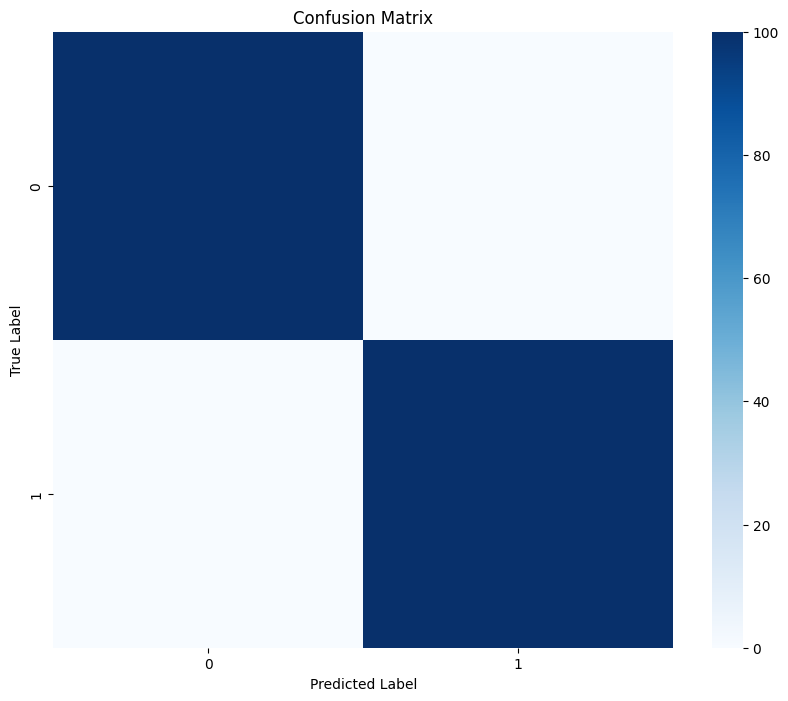

In [71]:
# Display confusion matrix
plt.figure(figsize=(10, 8)) 
sns.heatmap(conf_matrix, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


4. Given the image under the path B, write a function that given an image of cats, returns the number of how many cats are in the image

In [ ]:
def get_cat_num(B):
    image = preprocess(load_image(B)).unsqueeze(0).to(device)

    text_prompt = ["no cats"]

#### Part 4 - Dry Questions

---
1. A researcher is thinking to design a bag of words algorithm for flags detection.
Describe the pros and cons of the methods in this case. Below are some flag images you can use.


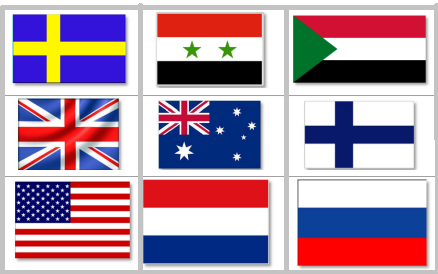



2. Danny is interested to design a dogs classifier. He has dataset of RGB images of 3 types of dogs in dimensions of 64X64 (i.e. the dimension of each image is 3X64X64). In the following table, the network architecture is defined in the leftmost column. You need to fill in the two additional columns: In the middle column fill the output dimensions and in the right column the number of learnd parameters (weights). The answer should be written as multiples (for example: 128 × 128 × 3 ).No need to consider bias. 

  **Conv7-N**: A convolution layer with N neurons, each one has dimensions of 7 × 7 × D where D is the volume depth activation in the previous layer. Padding = 2 and  Stride = 1.

  **POOL2**: 2 × 2  Max-Pooling activation with Stride=2. If the input to the layer is an odd number, round it down.

  **FC-N**: Fully Connected layer with N neurons. 

\begin{array}{|c|c|} \hline
\text{Layer} & \text{Output dimensions}  & \text{Number of parameters (weights)}  \\ \hline
INPUT & 64 × 64 × 3 & 0  \\ \hline
CONV7-16 &  &   \\\hline
POOL2 &  &   \\ \hline
CONV7-32 &  &   \\ \hline
POOL2 &  &   \\ \hline
FC-3 &  &   \\ \hline
\end{array}

3. You have built a neural network model for a classification problem and observed that it is overfitting. 


a. For each of the following factors, determine if it could be contributing to the overfitting, and explain how. If it is a contributing factor, suggest a method to mitigate its impact.

1. **Learning rate (Lr)**
2. **Batch size**
3. **Number of layers**
4. **Training set size**
5. **Test set size**

b. After conducting multiple trials with your model, you decided to add dropout to it. Describe the role of dropout during training and testing, and explain how it helps in reducing overfitting.
